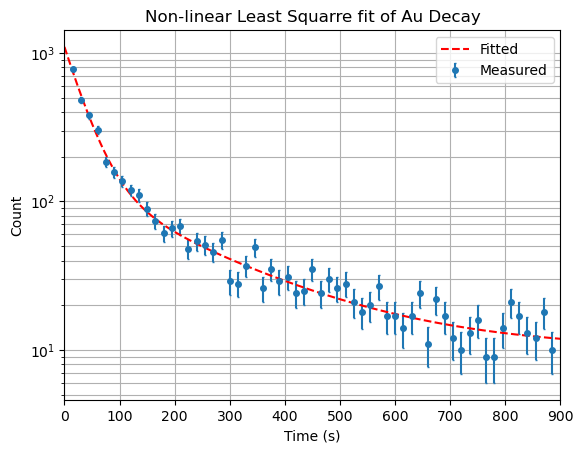

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = pd.read_csv("4_1_Non-linear fit-Silver Irrradiation Beta Decay_data.csv")
t = df['Time']
c = df['Measured Counts']
sigma_c = np.sqrt(c)

def decay(t,*p):
    a1, a2, a3, a4, a5 = p
    y = a1 + a2*np.exp(-t/a4) + a3*np.exp(-t/a5)
    return y

p_initial = [10,10,10,10,10]
popt, pcov = curve_fit(decay, t, c, p0 = p_initial, sigma = sigma_c, method = 'lm')

plt.title('Non-linear Least Squarre fit of Au Decay')
plt.xlabel('Time (s)')
plt.ylabel('Count')
plt.yscale('log')
plt.errorbar(t,c,yerr=sigma_c, label='Measured', marker='o', markersize=4, capsize=1, linestyle='none')
t1 = np.linspace(0,900,901)
y1 = decay(t1, *popt)
plt.plot(t1, y1, 'r--', label = 'Fitted')
plt.grid(axis='both', which = 'both')
plt.margins(x=0.)
plt.legend()
plt.show()

In [19]:
df = pd.read_csv('4_2_Composite_Curve_0.1_data.csv')
x = df['E(GeV)']+0.05 #bin의 값을 중심으로 이동함 (bin의 의미는 1번 row의 경우 0.1~0.2사이 에너지를 갖는 count가 18....이다라는 의미)
y = df['Counts']
e0 = 0.6
e1 = 1.4
x1 = x[(x<e0+0.05) | (x>e1+0.05)]
y1 = y[(x<e0+0.05) | (x>e1+0.05)]# 에너지 값 (x) 1번과 3번 영역만 추출


def func1(x, a, b, c): #1, 3 영역은 linear function을 사용해 background fitting
    return a+b*x+c*x**2

popt, pcov = curve_fit(func1, x1, y1)
def func2(x, a, b, c, A_0, E_0, Gamma):
    gamma = A_0*Gamma/(2*np.pi)/((x - E_0)**2 + (Gamma/2)**2)
    return a+b*x+c*x**2+gamma
sigma = np.sqrt(y) #푸아송 분포 가정
p_initial =np.append(popt, [60,1, 0.1])
popt2, pcov2 = curve_fit(func2, x, y, p0 = p_initial, sigma =sigma, method = 'lm')

In [20]:
xarr = np.linspace(x.min(), x.max(), 100) #그래프 그리기
yarr = func2(xarr, popt2[0], popt2[1], popt2[2], popt2[3], popt2[4], popt2[5])

In [25]:
x2 = x[(x>e0+0.05) & (x<e1+0.05)]
y2 = y[(x>e0+0.05) & (x<e1+0.05)]
sigma2 = np.sqrt(y2)

def Gamma(x,A_0, E_0, Gamma):
    gamma = A_0*Gamma/(2*np.pi)/((x - E_0)**2 + (Gamma/2)**2)
    return gamma

popt3, pcov3 = curve_fit(Gamma, x2, y2, p0=[60,1,0.1], sigma = sigma2, method = 'lm')
xarr2 = np.linspace(x2.min(), x2.max(), 30)
yarr2 = Gamma(xarr2, popt3[0], popt3[1], popt3[2])

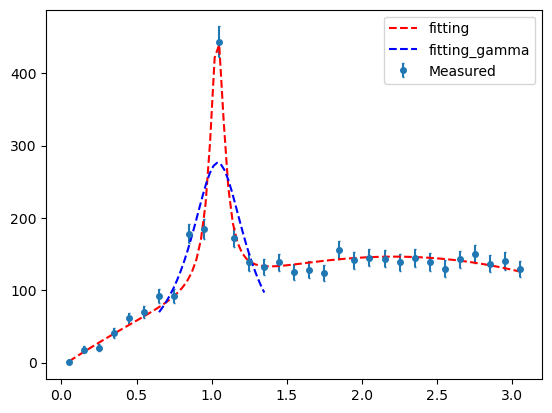

In [26]:
plt.errorbar(x,y,yerr=sigma,label = 'Measured', marker = 'o', markersize=4, capsize=1, linestyle='None')

plt.plot(xarr, yarr, 'r--', label = 'fitting')
plt.plot(xarr2, yarr2, 'b--', label = 'fitting_gamma')
plt.legend()